In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition.pca import PCA

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import read_csv,Series, DataFrame
import math
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas.io.data as web
import datetime
import tensorflow as tf
from sklearn import svm, preprocessing
import matplotlib.pyplot as plt
import math
from keras.layers.normalization import BatchNormalization

In [25]:
class KOSPIDATA:
    def __init__(self):
        start = datetime.datetime(1998, 5, 1)
        end = datetime.datetime(2016, 12, 31)
        kospi = web.DataReader("^KS11", "yahoo", start, end)
        self.arr_date= np.array(kospi.index)
        self.arr_open = np.array(kospi['Open'], dtype=float)
        self.arr_close= np.array(kospi['Adj Close'], dtype=float)
        self.arr_high= np.array(kospi.High, dtype=float)
        self.arr_low= np.array(kospi.Low, dtype=float)
        self.arr_volume= np.array(kospi.Volume, dtype=float)

In [26]:
K = KOSPIDATA()
# FEATURES = ['high', 'low', 'open', 'close', 'volume']
FEATURES = ['high', 'low', 'open', 'close']
data = {'year': K.arr_date,
        'open': K.arr_open,
        'high': K.arr_high,
        'low': K.arr_low,
        'close': K.arr_close}
# df = DataFrame(data, columns=['year', 'high', 'low', 'open', 'close'])
df = DataFrame(data, columns=['year', 'high', 'low', 'open', 'close'])

In [27]:
dataset = np.array(df[FEATURES].values[:-2,:])

In [28]:
dataset

array([[  401.529999,   389.820007,   401.529999,   391.799988],
       [  388.799988,   374.529999,   388.799988,   376.230011],
       [  380.450012,   369.950012,   376.109985,   379.470001],
       ..., 
       [ 2037.709961,  2031.540039,  2036.170044,  2035.900024],
       [ 2039.76001 ,  2034.800049,  2038.329956,  2037.75    ],
       [ 2044.430054,  2037.119995,  2040.73999 ,  2042.170044]])

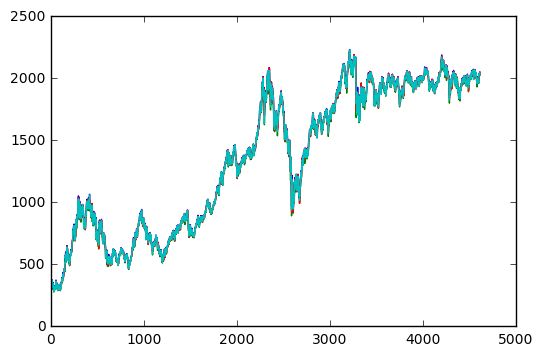

In [29]:
plt.plot(dataset)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['close'], df['open'], df['low'], zdir='z', c= 'blue')

In [ ]:
plt.show()

In [31]:
pca = PCA(n_components=4)
pca.fit(dataset)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
print (pca.explained_variance_ratio_)

[  9.99851994e-01   8.75408961e-05   5.18640996e-05   8.60143255e-06]


In [33]:
print (pca.components_)

[[-0.50062441 -0.49900474 -0.50040479 -0.49996451]
 [ 0.25001614 -0.27331037  0.66764289 -0.64579125]
 [ 0.59794162 -0.70687003 -0.20831838  0.31528406]
 [-0.57387538 -0.42027427  0.51034447  0.48330643]]


In [34]:
print (pca.explained_variance_)

[  1.29642694e+06   1.13507176e+02   6.72479691e+01   1.11527796e+01]


In [36]:
PCA(dataset)

PCA(copy=True, iterated_power='auto',
  n_components=array([[  401.53   ,   389.82001,   401.53   ,   391.79999],
       [  388.79999,   374.53   ,   388.79999,   376.23001],
       ...,
       [ 2039.76001,  2034.80005,  2038.32996,  2037.75   ],
       [ 2044.43005,  2037.12   ,  2040.73999,  2042.17004]]),
  random_state=None, svd_solver='auto', tol=0.0, whiten=False)

In [37]:
dataset

array([[  401.529999,   389.820007,   401.529999,   391.799988],
       [  388.799988,   374.529999,   388.799988,   376.230011],
       [  380.450012,   369.950012,   376.109985,   379.470001],
       ..., 
       [ 2037.709961,  2031.540039,  2036.170044,  2035.900024],
       [ 2039.76001 ,  2034.800049,  2038.329956,  2037.75    ],
       [ 2044.430054,  2037.119995,  2040.73999 ,  2042.170044]])

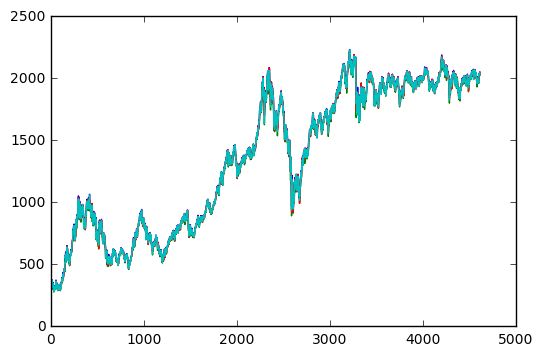

In [38]:
plt.plot(dataset)
plt.show()